In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

text tokenization
- text를 숫자로 이루어진 sequence로 변환하여 해당 단어와 색인을 dictionary 타입으로 얻고 padding을 하여 각 단어로 매핑된 숫자로 이루어진 행렬로 변경
- 단어를 나타내는 일련의 숫자 일 뿐

## Sentiment
### word embedding
- 단어와 관련된 단어가 N차원의 공간에 vector를 통해 군집화되어있음.
- establish meaning from them in a mathematical way.
- Words were mapped to vectors in higher dimensional space, and the semantics of the words then learned when those words were labelled with similar meaning. 
- inference from vectors' direction
-  meaning and the sequence matters in sub word tokenization

말뭉치 - corpus

자연언어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합이다. 컴퓨터의 발달로 말뭉치 분석이 용이해졌으며 분석의 정확성을 위해 해당 자연언어를 형태소 분석하는 경우가 많다. 확률/통계적 기법과 시계열적인 접근으로 전체를 파악한다. 언어의 빈도와 분포를 확인할 수 있는 자료이며, 현대 언어학 연구에 필수적인 자료이다. 인문학에 자연과학적 방법론이 가장 성공적으로 적용된 경우로 볼 수 있다.


## tensorflow_datasets
tensorflow의  built-in datasets
- train,test 분리되어 있음
### IMDB reviews dataset
Please find the link to he IMDB reviews dataset [here](http://ai.stanford.edu/~amaas/data/sentiment/)

You will find here 50,000 movie reviews which are classified as positive of negative.
- train 25,000
- test 25,000

In [5]:
import tensorflow as tf
print(tf.__version__) #Python 3, TF 2.x

# !pip install -q tensorflow-datasets

2.3.0


In [6]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNKXLC8/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNKXLC8/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteNKXLC8/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [7]:
import numpy as np
#각 25,000
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

#tfds iterable; 각 데이터의 sentences,labels를 tensor에서 numpy로 타입 변경하여 분리
# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
# copy them to encode and pad
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  #change to NumPy ndarray
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


- sentences : tf.Tensor(b"This is a simple test",shape=(), dtype=string)
- label : tf.Tensor(1, shape=(),dtype=int64) #positive

In [8]:
#Encoding: Tokenize sentences(문자열 토큰값으로 매핑) &padding

#Hyper parameter (10,000,16)
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

#list of numbers
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
# tokenized based on the word index that was learned from the training words -> More OOVs( 못본 데이터들 많아서)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [9]:
print(padded[0])
print(sequences[0])

[   0    0    0   12   14   33  425  392   18   90   28    1    9   32
 1366 3585   40  486    1  197   24   85  154   19   12  213  329   28
   66  247  215    9  477   58   66   85  114   98   22 5675   12 1322
  643  767   12   18    7   33  400 8170  176 2455  416    2   89 1231
  137   69  146   52    2    1 7577   69  229   66 2933   16    1 2904
    1    1 1479 4940    3   39 3900  117 1584   17 3585   14  162   19
    4 1231  917 7917    9    4   18   13   14 4139    5   99  145 1214
   11  242  683   13   48   24  100   38   12 7181 5515   38 1366    1
   50  401   11   98 1197  867  141   10]
[12, 14, 33, 425, 392, 18, 90, 28, 1, 9, 32, 1366, 3585, 40, 486, 1, 197, 24, 85, 154, 19, 12, 213, 329, 28, 66, 247, 215, 9, 477, 58, 66, 85, 114, 98, 22, 5675, 12, 1322, 643, 767, 12, 18, 7, 33, 400, 8170, 176, 2455, 416, 2, 89, 1231, 137, 69, 146, 52, 2, 1, 7577, 69, 229, 66, 2933, 16, 1, 2904, 1, 1, 1479, 4940, 3, 39, 3900, 117, 1584, 17, 3585, 14, 162, 19, 4, 1231, 917, 7917, 9, 4, 

In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? ? i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what

Embedding
- 문장내에 단어들줄에서 비슷한 맥락으로 사용하는 경우가 있음
예. imdb에선는  boring, dull은 부정적으로 분류된 리뷰에서 많이 나오고 , fun, exciting은 긍정적 분류된 리뷰에 많이 나옴
-  맥락적으로 비슷한 sentiment를 갖고 문장내에서 가까움을 알 수있고 vector도 비슷함.
 sentiment와 관련된 각 단어의 벡터
 - output : (embedding dim, max length of sentence) 사용되어 긍정,부정으로 분류할 수 있음
- 단어들 중에서 군집화된 단어들 끼리 비슷하게 분류됨

In [11]:
# text sentiment analysis classifier
# Flatten :slower ,more accurate
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) #
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [12]:
#flatten accuracy 1.0 on train , 0.83 on test => overfitting
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4999 - accuracy: 0.7365 - val_loss: 0.3551 - val_accuracy: 0.8439
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2355 - accuracy: 0.9096 - val_loss: 0.3707 - val_accuracy: 0.8391
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0841 - accuracy: 0.9797 - val_loss: 0.4524 - val_accuracy: 0.8271
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0216 - accuracy: 0.9975 - val_loss: 0.5320 - val_accuracy: 0.8269
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0074 - accuracy: 0.9993 - val_loss: 0.5850 - val_accuracy: 0.8265
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.6414 - val_accuracy: 0.8260
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 9.3884e-04 - accuracy: 1.0000 - val_loss: 0.6861 - val_accuracy: 0.8267
Ep

In [13]:
#GlobalAvgPool1D : averages across the vector to flatten it out. 
#더 빠름 (학습할 파라미터가 적음 )
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAvgPool1D(), 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
]) 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [14]:
# global avg pooling acc 0.957 on train, 0.5235 on val
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 7ms/step - loss: 0.5601 - accuracy: 0.7469 - val_loss: 0.3968 - val_accuracy: 0.8387
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 0.3386 - accuracy: 0.8606 - val_loss: 0.3317 - val_accuracy: 0.8572
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2750 - accuracy: 0.8888 - val_loss: 0.3306 - val_accuracy: 0.8583
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2382 - accuracy: 0.9058 - val_loss: 0.3408 - val_accuracy: 0.8557
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.2118 - accuracy: 0.9187 - val_loss: 0.3671 - val_accuracy: 0.8455
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1904 - accuracy: 0.9295 - val_loss: 0.3838 - val_accuracy: 0.8455
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1728 - accuracy: 0.9380 - val_loss: 0.4147 - val_accuracy: 0.8384
Epoch 

Visualize in the embedding projector: http://projector.tensorflow.org/

In [15]:
#take  embedding output
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [16]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  #단어색인 순서 바꿈 예. dog :1 -> 1:dog
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [17]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')
  #download 2 files and load datas to visualize on http://projector.tensorflow.org/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


하단은 실행한 결과로 PCA에서 2개의 주성분만 사용한 결과
- 왼쪽은 긍정, 오른쪽은 부정적으로 분류

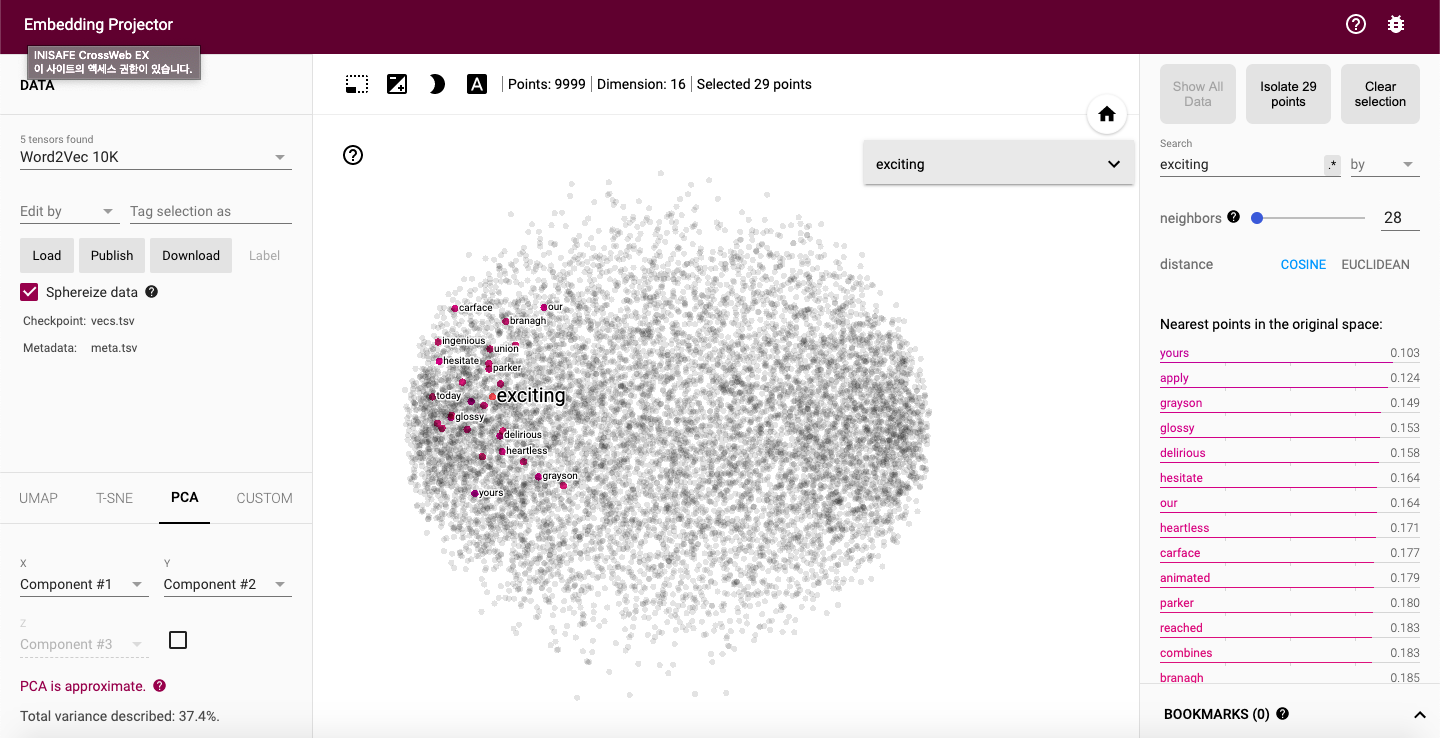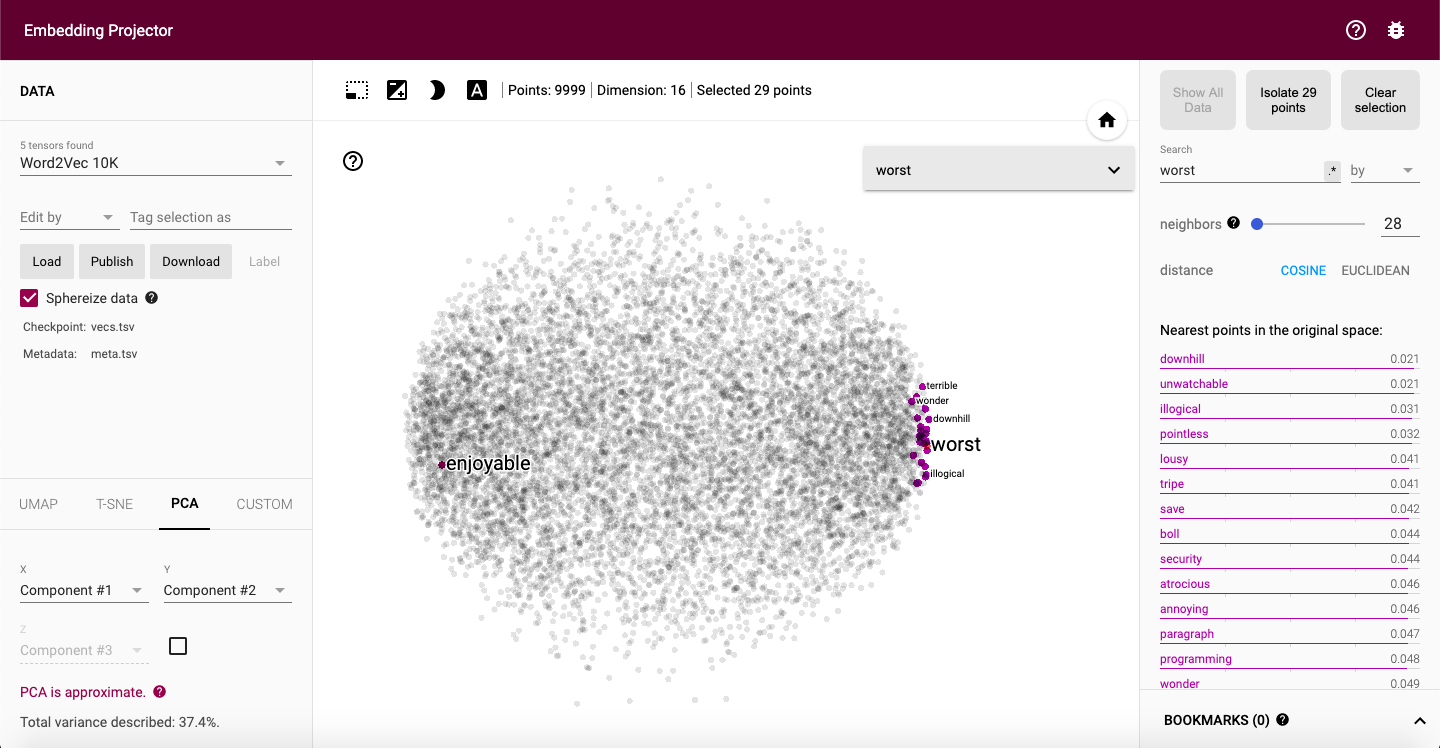